In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


In [3]:
fire_dt=pd.read_csv('F:\class hm\Forestfires.csv')
fire_dt.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
fire_dt.shape

(517, 31)

In [5]:
fire_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
labelencoder = LabelEncoder()
fire_dt.iloc[:, -1] = labelencoder.fit_transform(fire_dt.iloc[:,-1])
fire_dt['size_category']                                                 #1 for small, 0 for large
     

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

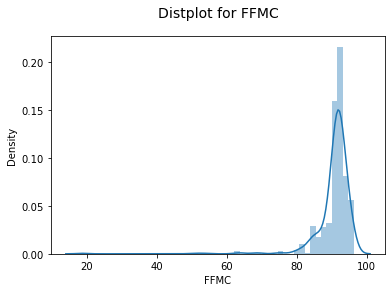

In [7]:
plt.title('Distplot for FFMC', fontsize=14, y = 1.06)
sns.distplot(fire_dt['FFMC'])
plt.show()

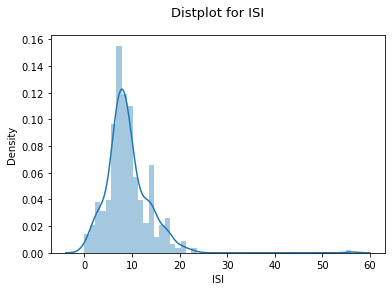

In [8]:
plt.title('Distplot for ISI', fontsize=13, y = 1.06)
sns.distplot(fire_dt['ISI'])
plt.show()

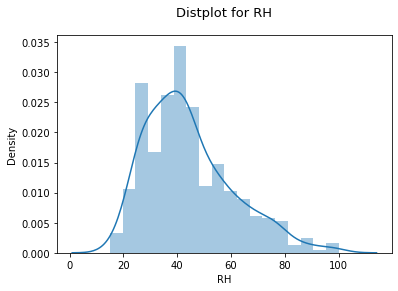

In [9]:
plt.title('Distplot for RH', fontsize=13, y = 1.06)
sns.distplot(fire_dt['RH'])
plt.show()

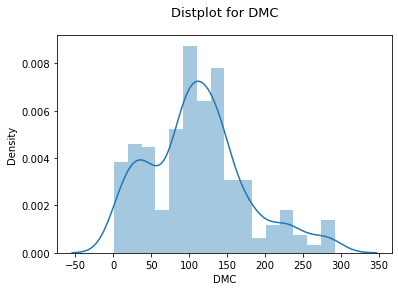

In [10]:
plt.title('Distplot for DMC', fontsize=13, y = 1.06)
sns.distplot(fire_dt['DMC'])
plt.show()

In [11]:
#Visualizing the target variable
y_count = fire_dt.size_category.value_counts().reset_index()
y_count

,index,size_category
0,1,378
1,0,139


In [12]:
#Other features with target variable
month_fire_dt = fire_dt.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_fire_dt.head(10)
     

,size_category,month,count
11,1,aug,141
21,1,sep,121
9,0,sep,51
1,0,aug,43
17,1,mar,42
15,1,jul,23
16,1,jun,14
13,1,feb,14
6,0,mar,12
20,1,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

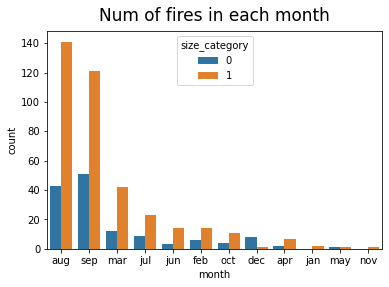

In [13]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_fire_dt)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

In [14]:
day_fire_dt = fire_dt.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_fire_dt

,size_category,day,count
10,1,sun,68
7,1,fri,64
9,1,sat,58
8,1,mon,55
11,1,thu,48
12,1,tue,44
13,1,wed,41
3,0,sun,27
2,0,sat,26
0,0,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

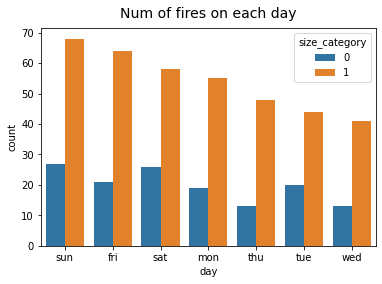

In [15]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_fire_dt)
plt.title("Num of fires on each day", fontsize=14, y=1.02)
     

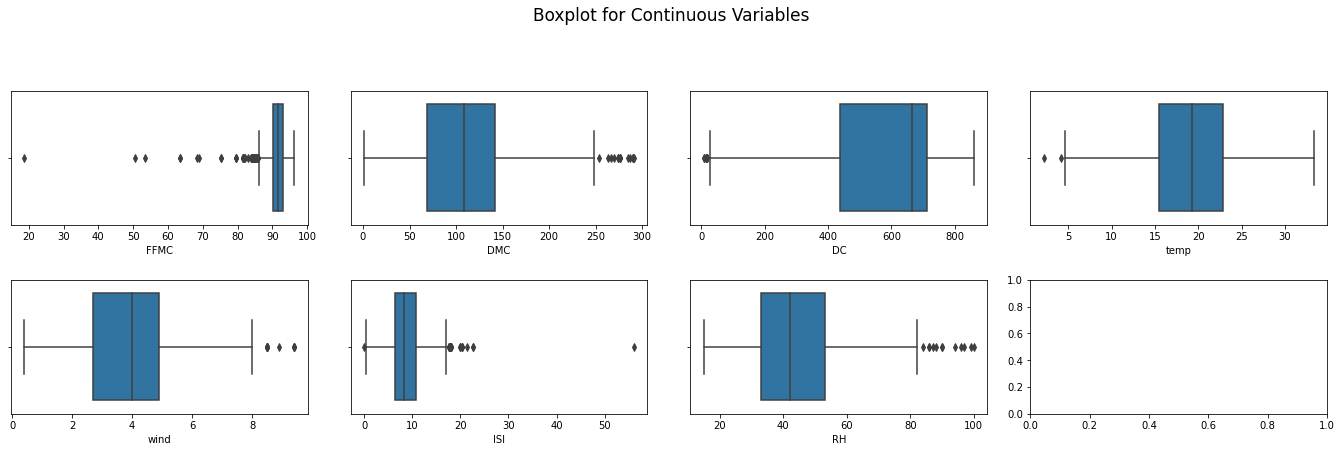

In [16]:
#check for outliers
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(fire_dt.FFMC, ax=ax[0,0])
sns.boxplot(fire_dt.DMC, ax=ax[0,1])
sns.boxplot(fire_dt.DC, ax=ax[0,2])
sns.boxplot(fire_dt.temp, ax=ax[0,3])
sns.boxplot(fire_dt.wind, ax=ax[1,0])
sns.boxplot(fire_dt.ISI, ax=ax[1,1])
sns.boxplot(fire_dt.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [17]:
fire_dt.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

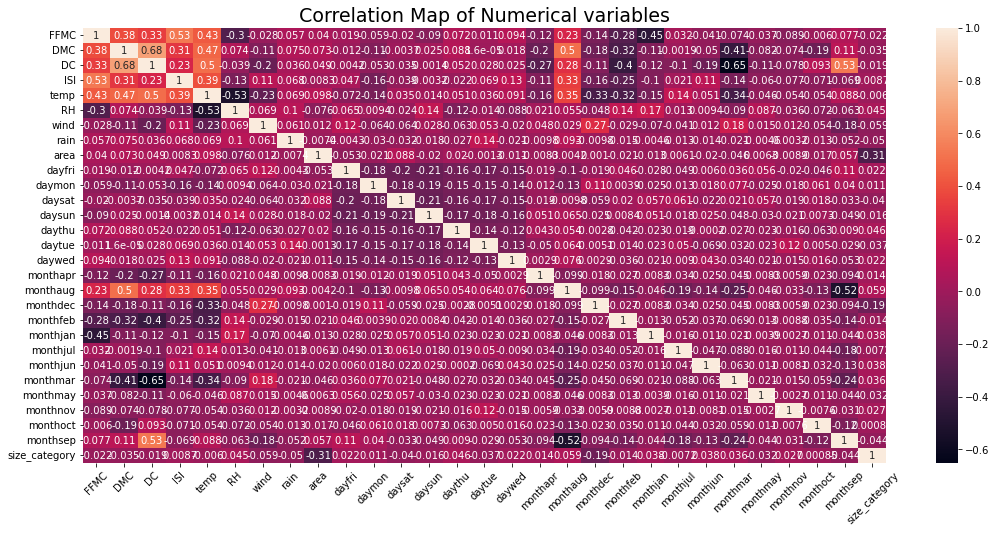

In [18]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(fire_dt.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

In [25]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# split into input (X) and output (Y) variables
x=fire_dt.iloc[:,2:30]
y=fire_dt.iloc[:,30]

In [26]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
model = Sequential()
model.add(Dense(18, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
509*0.67

341.03000000000003

In [30]:
import keras
history = model.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 2s 13ms/step - loss: 49.5684 - accuracy: 0.2428 - val_loss: 24.4471 - val_accuracy: 0.3216
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 12.9368 - accuracy: 0.3064 - val_loss: 1.1835 - val_accuracy: 0.6316
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 1.1034 - accuracy: 0.7457 - val_loss: 1.6432 - val_accuracy: 0.7368
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 0.7144 - accuracy: 0.7775 - val_loss: 0.9048 - val_accuracy: 0.7661
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.8035 - val_loss: 0.7207 - val_accuracy: 0.7602
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.8266 - val_loss: 0.6048 - val_accuracy: 0.7427
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8526 - val_loss: 0.6095 - val_accuracy: 0.7368
Epoch 8/2

In [31]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9826
accuracy: 98.26%


In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
scores

[0.051150087267160416, 0.9825918674468994]

In [34]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

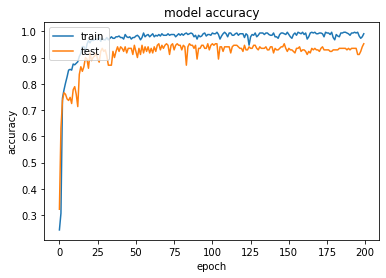

In [35]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# From the above model we got a best accuracy value which is about 98.26%,so there is no need to check the hyper parameters